In [333]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from datetime import datetime
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [334]:
df=pd.read_csv('day.csv')

In [335]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [336]:
df.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [337]:
df['season'].replace({1:"spring",2:"summer",3:"fall",4:"winter"},inplace=True)
df['weathersit'].replace({1:"cloudy",2:"sunny",3:"cold",4:'Rainy'},inplace=True)
df['weekday'].replace({0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thursday",5:"Friday",6:"Saturday"},inplace=True)
df['mnth'].replace({1:'Jan',2:'Feb',3:'March',4:'April',5:'May',6:'June',7:'July',8:"Aug",9:'Sept',10:'Oct',11:'Nov',12:'Dec'},inplace=True)

In [338]:
df.dtypes

instant         int64
dteday         object
season         object
yr              int64
mnth           object
holiday         int64
weekday        object
workingday      int64
weathersit     object
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [339]:
df['dteday']=pd.to_datetime(df['dteday'],dayfirst=True)

In [340]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,spring,0,Jan,0,Monday,1,sunny,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-01-02,spring,0,Jan,0,Tuesday,1,sunny,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-01-03,spring,0,Jan,0,Wednesday,1,cloudy,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-01-04,spring,0,Jan,0,Thursday,1,cloudy,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-01-05,spring,0,Jan,0,Friday,1,cloudy,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [341]:
df=df.drop(['instant','casual',	'registered'],axis=1)

In [342]:
df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,2018-01-01,spring,0,Jan,0,Monday,1,sunny,14.110847,18.18125,80.5833,10.749882,985
1,2018-01-02,spring,0,Jan,0,Tuesday,1,sunny,14.902598,17.68695,69.6087,16.652113,801
2,2018-01-03,spring,0,Jan,0,Wednesday,1,cloudy,8.050924,9.47025,43.7273,16.636703,1349
3,2018-01-04,spring,0,Jan,0,Thursday,1,cloudy,8.200000,10.60610,59.0435,10.739832,1562
4,2018-01-05,spring,0,Jan,0,Friday,1,cloudy,9.305237,11.46350,43.6957,12.522300,1600


In [343]:
#df.yr=df.yr.astype('str')

In [344]:
# mapping_dict = {'1': 2019, '0': 2018}
# df['yr'] = df['yr'].map(mapping_dict)
season=pd.get_dummies(df['season'],dtype=int)
weather=pd.get_dummies(df['weathersit'],dtype=int)
weekday=pd.get_dummies(df['weekday'],dtype=int)
month=pd.get_dummies(df['mnth'],dtype=int)

In [345]:
df=pd.concat((df,season),axis=1)
df=pd.concat((df,weather),axis=1)
df=pd.concat((df,weekday),axis=1)
df=pd.concat((df,month),axis=1)

In [346]:
df

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,...,Dec,Feb,Jan,July,June,March,May,Nov,Oct,Sept
0,2018-01-01,spring,0,Jan,0,Monday,1,sunny,14.110847,18.18125,...,0,0,1,0,0,0,0,0,0,0
1,2018-01-02,spring,0,Jan,0,Tuesday,1,sunny,14.902598,17.68695,...,0,0,1,0,0,0,0,0,0,0
2,2018-01-03,spring,0,Jan,0,Wednesday,1,cloudy,8.050924,9.47025,...,0,0,1,0,0,0,0,0,0,0
3,2018-01-04,spring,0,Jan,0,Thursday,1,cloudy,8.200000,10.60610,...,0,0,1,0,0,0,0,0,0,0
4,2018-01-05,spring,0,Jan,0,Friday,1,cloudy,9.305237,11.46350,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,2019-12-27,spring,1,Dec,0,Friday,1,sunny,10.420847,11.33210,...,1,0,0,0,0,0,0,0,0,0
726,2019-12-28,spring,1,Dec,0,Saturday,0,sunny,10.386653,12.75230,...,1,0,0,0,0,0,0,0,0,0
727,2019-12-29,spring,1,Dec,0,Sunday,0,sunny,10.386653,12.12000,...,1,0,0,0,0,0,0,0,0,0
728,2019-12-30,spring,1,Dec,0,Monday,1,cloudy,10.489153,11.58500,...,1,0,0,0,0,0,0,0,0,0


In [347]:
df=df.drop(['season','weathersit','weekday','mnth','dteday'], axis=1)

In [348]:
df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,fall,spring,...,Dec,Feb,Jan,July,June,March,May,Nov,Oct,Sept
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,0,1,...,0,0,1,0,0,0,0,0,0,0
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,0,1,...,0,0,1,0,0,0,0,0,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,1,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,1,...,0,0,1,0,0,0,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,1,...,0,0,1,0,0,0,0,0,0,0


In [349]:
df_train , df_test = train_test_split(df,train_size=.70,random_state=100)

In [350]:
sc=MinMaxScaler()
num_vars=[ 'yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum',
       'windspeed', 'cnt', 'fall', 'spring', 'summer', 'winter', 'cloudy',
       'cold', 'sunny', 'Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday',
       'Tuesday', 'Wednesday', 'April', 'Aug', 'Dec', 'Feb', 'Jan', 'July',
       'June', 'March', 'May', 'Nov', 'Oct', 'Sept']
df_train[num_vars]=sc.fit_transform(df_train[num_vars])

In [351]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,fall,spring,...,Dec,Feb,Jan,July,June,March,May,Nov,Oct,Sept
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537440,0.513156,0.650480,0.320883,0.513499,0.262745,0.243137,...,0.084314,0.066667,0.088235,0.076471,0.076471,0.098039,0.084314,0.086275,0.084314,0.080392
std,0.500429,0.157763,0.453386,0.225858,0.212410,0.145846,0.169803,0.224421,0.440557,0.429398,...,0.278131,0.249689,0.283915,0.266010,0.266010,0.297660,0.278131,0.281045,0.278131,0.272166
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [352]:
y_train=df_train.pop('cnt')
X_train=df_train

In [353]:
lm=LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [354]:
rfe=RFE(lm,n_features_to_select=15)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [355]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 5),
 ('temp', True, 1),
 ('atemp', False, 4),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('fall', True, 1),
 ('spring', True, 1),
 ('summer', False, 12),
 ('winter', True, 1),
 ('cloudy', True, 1),
 ('cold', True, 1),
 ('sunny', True, 1),
 ('Friday', False, 10),
 ('Monday', False, 19),
 ('Saturday', False, 6),
 ('Sunday', False, 7),
 ('Thursday', False, 9),
 ('Tuesday', False, 18),
 ('Wednesday', False, 13),
 ('April', False, 17),
 ('Aug', False, 11),
 ('Dec', False, 2),
 ('Feb', False, 3),
 ('Jan', True, 1),
 ('July', True, 1),
 ('June', False, 14),
 ('March', False, 16),
 ('May', False, 8),
 ('Nov', True, 1),
 ('Oct', False, 15),
 ('Sept', True, 1)]

In [356]:
X_train.columns[rfe.support_]

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'fall', 'spring', 'winter',
       'cloudy', 'cold', 'sunny', 'Jan', 'July', 'Nov', 'Sept'],
      dtype='object')

In [357]:
rejected=X_train.columns[~rfe.support_]

In [358]:
col=X_train.columns[rfe.support_]
X_train=df_train[col]

In [359]:
X_train_sm=sm.add_constant(X_train)

In [360]:
lm1=sm.OLS(y_train,X_train_sm).fit()

In [361]:
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     190.8
Date:                Tue, 26 Mar 2024   Prob (F-statistic):          4.41e-189
Time:                        20:07:11   Log-Likelihood:                 512.08
No. Observations:                 510   AIC:                            -994.2
Df Residuals:                     495   BIC:                            -930.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1901      0.027      7.145      0.000       0.138       0.242
yr             0.2302      0.008     28.371      0.000       0.214       0.246
holiday       -0.0920      0.026     -3.582      0.000      -0.142      -0.042
temp           0.5055      0.035     14.369      0.000       0.436       0.575
hum           -0.1697      0.038     -4.497      0.000      -0.244      -0.096
windspeed     -0.1858      0.026     -7.190      0.000      -0.237      -0.135
fall          -0.0479      0.015     -3.168      0.002      -0.078      -0.018
spring        -0.1041      0.015     -6.762      0.000      -0.134      -0.074
winter         0.0492      0.014      3.549      0.000       0.022       0.076
cloudy         0.1611      0.010     16.933      0.000       0.142       0.180
cold          -0.0793      0.022     -3.613      0.000      -0.122      -0.036
sunny          0.1083      0.012      9.185      0.000       0.085       0.131
Jan           -0.0341      0.018     -1.936      0.053      -0.069       0.001
July          -0.0559      0.018     -3.057      0.002      -0.092      -0.020
Nov           -0.0236      0.017     -1.362      0.174      -0.058       0.010
Sept           0.0802      0.017      4.775      0.000       0.047       0.113
==============================================================================
Omnibus:                       60.634   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              138.746
Skew:                          -0.640   Prob(JB):                     7.44e-31
Kurtosis:                       5.211   Cond. No.                     9.57e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.59e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [362]:
vif = pd.DataFrame()
X = X_train
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
8,cloudy,38.55
10,sunny,27.00
2,temp,3.97
9,cold,3.76
5,fall,2.79
6,spring,2.75
7,winter,2.25
3,hum,1.90
11,Jan,1.57
12,July,1.49


In [363]:
X_train=X_train.drop('cloudy',axis=1)

In [364]:
vif = pd.DataFrame()
X = X_train
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,23.88
2,temp,20.59
4,windspeed,4.18
5,fall,3.78
6,spring,2.92
7,winter,2.78
9,sunny,2.25
0,yr,2.07
10,Jan,1.68
11,July,1.61


In [365]:
X_train_sm=sm.add_constant(X_train)
lm2=sm.OLS(y_train,X_train_sm).fit()
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     190.8
Date:                Tue, 26 Mar 2024   Prob (F-statistic):          4.41e-189
Time:                        20:07:11   Log-Likelihood:                 512.08
No. Observations:                 510   AIC:                            -994.2
Df Residuals:                     495   BIC:                            -930.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3512      0.031     11.225      0.000       0.290       0.413
yr             0.2302      0.008     28.371      0.000       0.214       0.246
holiday       -0.0920      0.026     -3.582      0.000      -0.142      -0.042
temp           0.5055      0.035     14.369      0.000       0.436       0.575
hum           -0.1697      0.038     -4.497      0.000      -0.244      -0.096
windspeed     -0.1858      0.026     -7.190      0.000      -0.237      -0.135
fall          -0.0479      0.015     -3.168      0.002      -0.078      -0.018
spring        -0.1041      0.015     -6.762      0.000      -0.134      -0.074
winter         0.0492      0.014      3.549      0.000       0.022       0.076
cold          -0.2404      0.026     -9.131      0.000      -0.292      -0.189
sunny         -0.0528      0.010     -5.047      0.000      -0.073      -0.032
Jan           -0.0341      0.018     -1.936      0.053      -0.069       0.001
July          -0.0559      0.018     -3.057      0.002      -0.092      -0.020
Nov           -0.0236      0.017     -1.362      0.174      -0.058       0.010
Sept           0.0802      0.017      4.775      0.000       0.047       0.113
==============================================================================
Omnibus:                       60.634   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              138.746
Skew:                          -0.640   Prob(JB):                     7.44e-31
Kurtosis:                       5.211   Cond. No.                         18.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [366]:
X_train=X_train.drop('hum',axis=1)

In [367]:
X_train_sm=sm.add_constant(X_train)
lm3=sm.OLS(y_train,X_train_sm).fit()
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     196.3
Date:                Tue, 26 Mar 2024   Prob (F-statistic):          5.93e-186
Time:                        20:07:11   Log-Likelihood:                 501.87
No. Observations:                 510   AIC:                            -975.7
Df Residuals:                     496   BIC:                            -916.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2621      0.025     10.620      0.000       0.214       0.311
yr             0.2344      0.008     28.540      0.000       0.218       0.251
holiday       -0.0929      0.026     -3.550      0.000      -0.144      -0.041
temp           0.4656      0.035     13.420      0.000       0.397       0.534
windspeed     -0.1532      0.025     -6.061      0.000      -0.203      -0.104
fall          -0.0413      0.015     -2.690      0.007      -0.071      -0.011
spring        -0.1069      0.016     -6.819      0.000      -0.138      -0.076
winter         0.0389      0.014      2.793      0.005       0.012       0.066
cold          -0.2869      0.025    -11.625      0.000      -0.335      -0.238
sunny         -0.0797      0.009     -9.109      0.000      -0.097      -0.062
Jan           -0.0390      0.018     -2.178      0.030      -0.074      -0.004
July          -0.0506      0.019     -2.718      0.007      -0.087      -0.014
Nov           -0.0212      0.018     -1.199      0.231      -0.056       0.014
Sept           0.0741      0.017      4.343      0.000       0.041       0.108
==============================================================================
Omnibus:                       62.126   Durbin-Watson:                   2.050
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              143.195
Skew:                          -0.653   Prob(JB):                     8.05e-32
Kurtosis:                       5.244   Cond. No.                         15.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [368]:
vif = pd.DataFrame()
X = X_train
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,7.17
3,windspeed,4.17
4,fall,3.69
5,spring,2.30
6,winter,2.23
0,yr,2.07
9,Jan,1.61
11,Nov,1.61
10,July,1.58
8,sunny,1.54


In [369]:
X_train=X_train.drop('temp',axis=1)

In [370]:
X_train_sm=sm.add_constant(X_train)
lm3=sm.OLS(y_train,X_train_sm).fit()
print(lm3.summary())
vif = pd.DataFrame()
X = X_train
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                     145.3
Date:                Tue, 26 Mar 2024   Prob (F-statistic):          7.40e-154
Time:                        20:07:11   Log-Likelihood:                 422.89
No. Observations:                 510   AIC:                            -819.8
Df Residuals:                     497   BIC:                            -764.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5414      0.015     34.988      0.0

,Features,VIF
2,windspeed,2.81
3,fall,2.40
4,spring,2.30
5,winter,2.07
0,yr,1.84
8,Jan,1.59
10,Nov,1.59
9,July,1.57
7,sunny,1.47
11,Sept,1.42


In [371]:
X_train=X_train.drop('winter',axis=1)

In [372]:
X_train_sm=sm.add_constant(X_train)
lm3=sm.OLS(y_train,X_train_sm).fit()
print(lm3.summary())
vif = pd.DataFrame()
X = X_train
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                     158.5
Date:                Tue, 26 Mar 2024   Prob (F-statistic):          8.70e-155
Time:                        20:07:11   Log-Likelihood:                 422.46
No. Observations:                 510   AIC:                            -820.9
Df Residuals:                     498   BIC:                            -770.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5346      0.014     39.284      0.0

,Features,VIF
2,windspeed,2.62
3,fall,2.21
4,spring,2.16
0,yr,1.79
7,Jan,1.59
8,July,1.56
6,sunny,1.43
10,Sept,1.38
9,Nov,1.17
1,holiday,1.06


In [373]:
X_train=X_train.drop('July',axis=1)

In [374]:
X_train_sm=sm.add_constant(X_train)
lm3=sm.OLS(y_train,X_train_sm).fit()
print(lm3.summary())
vif = pd.DataFrame()
X = X_train
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                     174.4
Date:                Tue, 26 Mar 2024   Prob (F-statistic):          8.19e-156
Time:                        20:07:11   Log-Likelihood:                 422.21
No. Observations:                 510   AIC:                            -822.4
Df Residuals:                     499   BIC:                            -775.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5342      0.014     39.316      0.0

,Features,VIF
2,windspeed,2.62
4,spring,2.16
0,yr,1.79
7,Jan,1.59
3,fall,1.54
6,sunny,1.43
9,Sept,1.26
8,Nov,1.17
1,holiday,1.06
5,cold,1.06


In [375]:
X_train=X_train.drop('windspeed',axis=1)

In [376]:
X_train_sm=sm.add_constant(X_train)
lm3=sm.OLS(y_train,X_train_sm).fit()
print(lm3.summary())
vif = pd.DataFrame()
X = X_train
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.757
Method:                 Least Squares   F-statistic:                     177.0
Date:                Tue, 26 Mar 2024   Prob (F-statistic):          3.16e-149
Time:                        20:07:12   Log-Likelihood:                 403.94
No. Observations:                 510   AIC:                            -787.9
Df Residuals:                     500   BIC:                            -745.5
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4774      0.010     46.671      0.0

,Features,VIF
3,spring,1.78
6,Jan,1.58
0,yr,1.52
2,fall,1.44
5,sunny,1.32
8,Sept,1.26
7,Nov,1.11
1,holiday,1.06
4,cold,1.02


In [377]:
rejected

Index(['workingday', 'atemp', 'summer', 'Friday', 'Monday', 'Saturday',
       'Sunday', 'Thursday', 'Tuesday', 'Wednesday', 'April', 'Aug', 'Dec',
       'Feb', 'June', 'March', 'May', 'Oct'],
      dtype='object')

In [378]:
X_train['Sunday']=df_train['Sunday']

In [379]:
X_train_sm=sm.add_constant(X_train)
lm3=sm.OLS(y_train,X_train_sm).fit()
print(lm3.summary())
vif = pd.DataFrame()
X = X_train
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.757
Method:                 Least Squares   F-statistic:                     159.3
Date:                Tue, 26 Mar 2024   Prob (F-statistic):          2.80e-148
Time:                        20:07:12   Log-Likelihood:                 404.39
No. Observations:                 510   AIC:                            -786.8
Df Residuals:                     499   BIC:                            -740.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4759      0.010     45.945      0.0

,Features,VIF
3,spring,1.80
6,Jan,1.58
0,yr,1.54
2,fall,1.46
5,sunny,1.34
8,Sept,1.26
9,Sunday,1.14
7,Nov,1.11
1,holiday,1.06
4,cold,1.02


In [380]:
X_train=X_train.drop('Sunday',axis=1)

In [381]:
X_train['Saturday']=df_train['Saturday']
X_train_sm=sm.add_constant(X_train)
lm3=sm.OLS(y_train,X_train_sm).fit()
print(lm3.summary())
vif = pd.DataFrame()
X = X_train
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.762
Model:                            OLS   Adj. R-squared:                  0.757
Method:                 Least Squares   F-statistic:                     159.8
Date:                Tue, 26 Mar 2024   Prob (F-statistic):          1.53e-148
Time:                        20:07:12   Log-Likelihood:                 405.01
No. Observations:                 510   AIC:                            -788.0
Df Residuals:                     499   BIC:                            -741.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4750      0.010     45.884      0.0

,Features,VIF
3,spring,1.79
6,Jan,1.58
0,yr,1.53
2,fall,1.46
5,sunny,1.33
8,Sept,1.26
9,Saturday,1.12
7,Nov,1.11
1,holiday,1.06
4,cold,1.03


In [382]:
X_train=X_train.drop('Saturday',axis=1)
X_train['Aug']=df_train['Aug']
X_train_sm=sm.add_constant(X_train)
lm3=sm.OLS(y_train,X_train_sm).fit()
print(lm3.summary())
vif = pd.DataFrame()
X = X_train
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     160.4
Date:                Tue, 26 Mar 2024   Prob (F-statistic):          8.06e-149
Time:                        20:07:12   Log-Likelihood:                 405.67
No. Observations:                 510   AIC:                            -789.3
Df Residuals:                     499   BIC:                            -742.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4778      0.010     46.809      0.0

,Features,VIF
2,fall,2.39
9,Aug,1.84
3,spring,1.78
6,Jan,1.58
0,yr,1.53
8,Sept,1.46
5,sunny,1.33
7,Nov,1.11
1,holiday,1.06
4,cold,1.02


In [383]:
X_train=X_train.drop('Aug',axis=1)
X_train['workingday']=df_train['workingday']
X_train_sm=sm.add_constant(X_train)
lm3=sm.OLS(y_train,X_train_sm).fit()
print(lm3.summary())
vif = pd.DataFrame()
X = X_train
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     160.5
Date:                Tue, 26 Mar 2024   Prob (F-statistic):          6.80e-149
Time:                        20:07:12   Log-Likelihood:                 405.84
No. Observations:                 510   AIC:                            -789.7
Df Residuals:                     499   BIC:                            -743.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4943      0.013     36.813      0.0

,Features,VIF
9,workingday,2.17
3,spring,1.93
0,yr,1.74
6,Jan,1.58
2,fall,1.57
5,sunny,1.38
8,Sept,1.26
7,Nov,1.18
1,holiday,1.09
4,cold,1.04


In [384]:
X_train=X_train.drop('workingday',axis=1)
X_train['Dec']=df_train['Dec']
X_train_sm=sm.add_constant(X_train)
lm3=sm.OLS(y_train,X_train_sm).fit()
print(lm3.summary())
vif = pd.DataFrame()
X = X_train
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.766
Method:                 Least Squares   F-statistic:                     167.5
Date:                Tue, 26 Mar 2024   Prob (F-statistic):          2.04e-152
Time:                        20:07:12   Log-Likelihood:                 414.18
No. Observations:                 510   AIC:                            -806.4
Df Residuals:                     499   BIC:                            -759.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4900      0.010     47.040      0.0

,Features,VIF
3,spring,1.82
6,Jan,1.61
0,yr,1.54
2,fall,1.45
5,sunny,1.34
8,Sept,1.26
7,Nov,1.11
9,Dec,1.10
1,holiday,1.06
4,cold,1.02


In [385]:
y_train_pred=lm3.predict(X_train_sm)
mse = mean_squared_error(y_train, y_train_pred)
r_squared = r2_score(y_train, y_train_pred)
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 0.011538082926617038
r_square_value : 0.7704593421366392


In [386]:
y_train.shape
X_train_sm.columns

Index(['const', 'yr', 'holiday', 'fall', 'spring', 'cold', 'sunny', 'Jan',
       'Nov', 'Sept', 'Dec'],
      dtype='object')

Text(0.5, 0.98, 'Actual and Predicted')

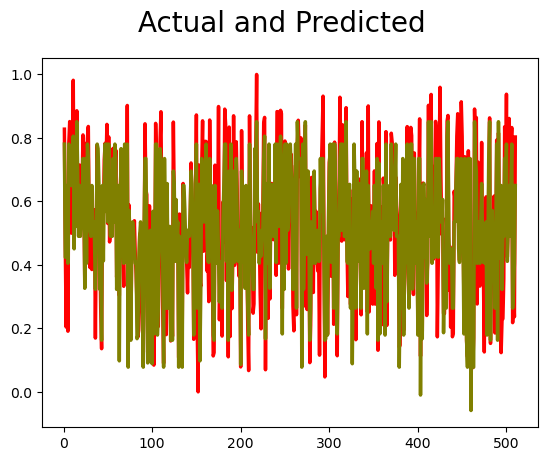

In [387]:
c = [i for i in range(1,511,1)]
fig = plt.figure()
plt.plot(c,y_train, color="red", linewidth=2.5, linestyle="-")
plt.plot(c,y_train_pred, color="olive",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 



In [388]:
df_test[num_vars]=sc.transform(df_test[num_vars])
y_test=df_test.pop('cnt')

In [397]:
X_test=df_test[[ 'yr', 'holiday', 'fall', 'spring', 'cold', 'sunny', 'Jan','Nov', 'Sept', 'Dec']]
X_test=sm.add_constant(X_test)
y_test_pred=lm3.predict(X_test)

In [398]:
mse = mean_squared_error(y_test, y_test_pred)
r_squared = r2_score(y_test, y_test_pred)
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 0.010401350072358451
r_square_value : 0.7824635196953115


In [399]:
y_test.shape,y_test_pred.shape

((220,), (220,))

Text(0.5, 0.98, 'Actual and Predicted')

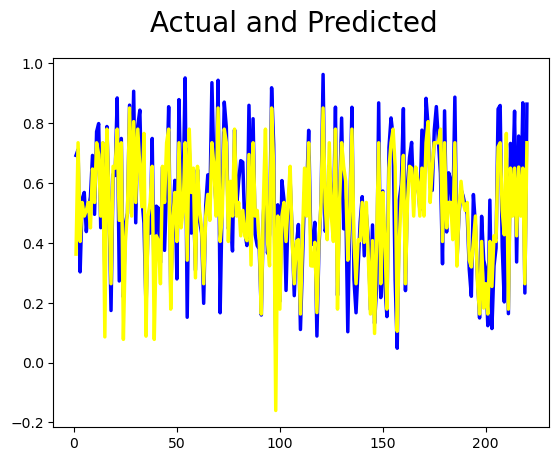

In [400]:
  c = [i for i in range(1,221,1)]
fig = plt.figure()
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,y_test_pred, color="yellow",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
 

Text(0.5, 0, 'Errors')

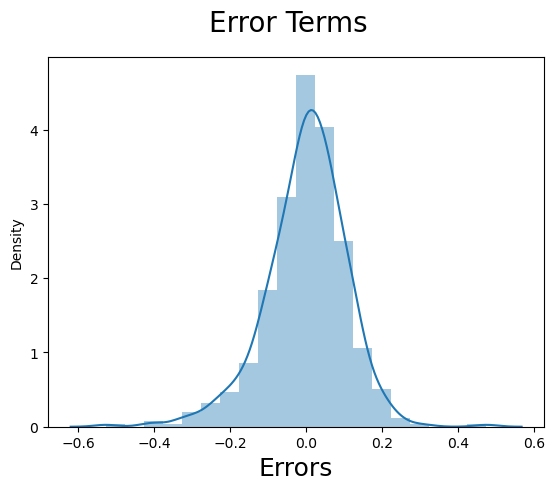

In [401]:
res=y_train-y_train_pred
fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18) 

Text(0.5, 0, 'Errors')

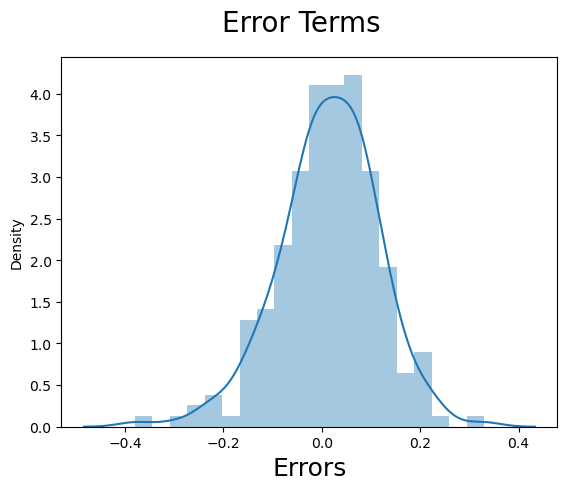

In [402]:
res=y_test-y_test_pred
fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18) 